## Setup

I use mixture of Sci-Kit Learn and TensorFlow models for this project as developing an SVM with Tensorflow seemd quite challenging. I'm sure it can be done, but I did not have the time to divert into learning.

In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import KFold, learning_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif

### Helper Functions

I beleive all these helper functions come from my Project 1 or Project 2 for the MLP. They were very helpful in making the Tensorflow model run with my K-Folds code. The create mlp function is the only new function, and it just implements a very basic MLP. I did not want to optimize this too much as I felt the goal of the project was more to compare the two models as basically as posssible while exploring feature selection and other chances to reduce overfitting.

In [40]:
class_1 = 1
class_2 = 0
np.random.seed(1)

def create_mlp(input_nodes):
    model = models.Sequential()
    model.add(layers.Dense(input_nodes, input_shape=(input_nodes,), activation="relu"))
    model.add(layers.Dense(int((input_nodes+output_nodes)/2), activation="relu"))
    model.add(layers.Dense(2, activation="softmax"))
    model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

def fit_model(model, data_array, eps=10):
    x_train = data_array[0]
    y_train = data_array[1]
    x_test = data_array[2]
    y_test = data_array[3]
    history = model.fit(x_train, y_train, epochs=eps, validation_data=(x_test, y_test))
    return history

def plot_accuracy(history, metric='accuracy'):
    plt.plot(history.history[metric], label=metric)
    plt.plot(history.history[f'val_{metric}'], label = f'val_{metric}')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()
    
def report_accuracy(model, test_set):
    test_loss, test_acc = model.evaluate(test_set[0],  test_set[1], verbose=2)
    return test_acc
    
def encode(data):
    temp = []
    for y in data:
        if y == 'B':
            temp += [class_1]
        elif y == 'M':
            temp += [class_2]
    return(temp)
    
def decode(encoded_class):
    classes = [class_1, class_2]
    for idx in range(len(classes)):
        if not (encoded_class-classes[idx]).any():
            return idx+1
        
def decode_spec(encoded_class):
    classes = [class_1, class_2, class_3]
    for idx in range(len(classes)):
        if not encoded_class ==classes[idx]:
            return idx+1

### Get Data

In [41]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [42]:
classes = df.pop(1)
x_train, x_test, y_train, y_test = train_test_split(df, classes, test_size=0.2)
x_train =(x_train-x_train.min())/(x_train.max()-x_train.min())
x_test =(x_test-x_test.min())/(x_test.max()-x_test.min())
x_train.to_numpy()
x_test.to_numpy()
y_train.to_numpy()
y_test.to_numpy()
y_train = np.array(encode(y_train))
y_test = np.array(encode(y_test))

data_chunks = [x_train, y_train, x_test, y_test]

output_nodes = len(set(classes))
input_nodes = len(x_train.columns)
metric_options=['accuracy','loss']

## Make MLP

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 1s 15ms/step - loss: 0.6295 - accuracy: 0.7846 - val_loss: 0.6209 - val_accuracy: 0.7193
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.5547 - accuracy: 0.8923 - val_loss: 0.5572 - val_accuracy: 0.7807
Epoch 3/10
 1/15 [=>............................] - ETA: 0s - loss: 0.4947 - accuracy: 0.9688

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 0s 12ms/step - loss: 0.4851 - accuracy: 0.9143 - val_loss: 0.5048 - val_accuracy: 0.8158
Epoch 4/10
15/15 [==============================] - 0s 18ms/step - loss: 0.4198 - accuracy: 0.9231 - val_loss: 0.4420 - val_accuracy: 0.8333
Epoch 5/10
15/15 [==============================] - 0s 16ms/step - loss: 0.3613 - accuracy: 0.9319 - val_loss: 0.4042 - val_accuracy: 0.8333
Epoch 6/10
15/15 [==============================] - 0s 12ms/step - loss: 0.3129 - accuracy: 0.9231 - val_loss: 0.3539 - val_accuracy: 0.8596
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.2659 - accuracy: 0.9253 - val_loss: 0.3148 - val_accuracy: 0.8860
Epoch 8/10
15/15 [==============================] - 0s 4ms/step - loss: 0.2329 - accuracy: 0.9231 - val_loss: 0.2927 - val_accuracy: 0.8772
Epoch 9/10
15/15 [==============================] - 0s 5ms/step - loss: 0.2089 - accuracy: 0.9319 - val_loss: 0.2624 - val_accuracy: 0.8947
Epoch 10/10
15/15 [========

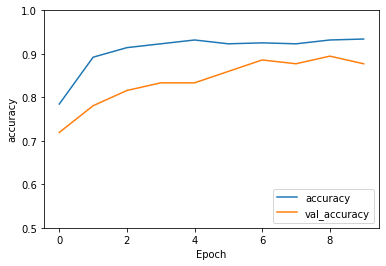

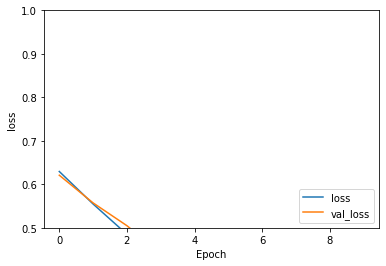

4/4 - 0s - loss: 0.2504 - accuracy: 0.8772 - 22ms/epoch - 6ms/step
0.8771929740905762


In [43]:
model = create_mlp(input_nodes)
history = fit_model(model,data_chunks) #change epochs later
for metric in metric_options:
    plot_accuracy(history, metric)
print(report_accuracy(model, data_chunks[2:]))

Overall, the model accuracy is not too bad. It could stand to be better, but there are not any glaring sign that my model is overfiiting. Still, I want to run some feature selection.

## Feature Selection Then MLP Redo

I pick the top 10 atttributes based on information gain. I think Fisher and chi-square both are better for my use case; however, I haven't had a chance to implement information gain before.

In [44]:
col_names = [str(i) for i in df.columns]

In [45]:
# Select top features via Information Gain:
importances = mutual_info_classif(x_train, y_train)
feat_importances = pd.Series(importances, col_names)
feat_importances = dict(feat_importances)

In [46]:
features = []
num_feat = 10
for t in range(num_feat):
  val = 0
  pos = 0
  for i,f in feat_importances.items():
    if val<f:
      val=f
      pos=i
  del feat_importances[pos]
  features += [int(pos)]

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 1s 13ms/step - loss: 0.6783 - accuracy: 0.3934 - val_loss: 0.6766 - val_accuracy: 0.3947
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.4462 - val_loss: 0.6674 - val_accuracy: 0.4649
Epoch 3/10
 1/15 [=>............................] - ETA: 0s - loss: 0.6716 - accuracy: 0.5625

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 0s 4ms/step - loss: 0.6592 - accuracy: 0.5319 - val_loss: 0.6575 - val_accuracy: 0.5614
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 0.6475 - accuracy: 0.6462 - val_loss: 0.6444 - val_accuracy: 0.6579
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.6289 - accuracy: 0.8000 - val_loss: 0.6208 - val_accuracy: 0.7719
Epoch 6/10
15/15 [==============================] - 0s 4ms/step - loss: 0.5997 - accuracy: 0.8681 - val_loss: 0.5923 - val_accuracy: 0.8684
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.5717 - accuracy: 0.8659 - val_loss: 0.5626 - val_accuracy: 0.8772
Epoch 8/10
15/15 [==============================] - 0s 5ms/step - loss: 0.5340 - accuracy: 0.8813 - val_loss: 0.5211 - val_accuracy: 0.8947
Epoch 9/10
15/15 [==============================] - 0s 5ms/step - loss: 0.4923 - accuracy: 0.8703 - val_loss: 0.4883 - val_accuracy: 0.8947
Epoch 10/10
15/15 [============

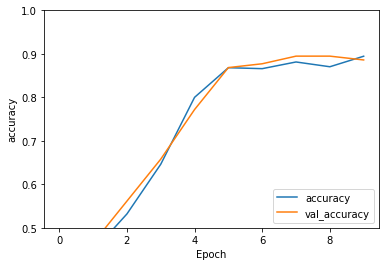

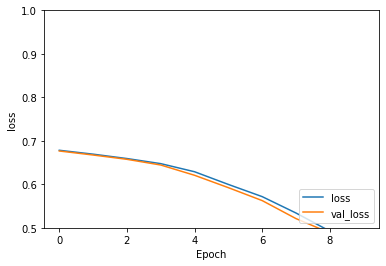

4/4 - 0s - loss: 0.4566 - accuracy: 0.8860 - 24ms/epoch - 6ms/step
0.8859649300575256


In [47]:
new_x_train = x_train[features]
new_x_test = x_test[features]
new_data_chunks = [new_x_train, y_train, new_x_test, y_test]

model = create_mlp(num_feat)
history = fit_model(model,new_data_chunks) #change epochs later
for metric in metric_options:
    plot_accuracy(history, metric)
print(report_accuracy(model, new_data_chunks[2:]))

It looks pretty variable on what the accuracy is, so let's just try K-Fold and see what happens.

## K-Fold Cross Validation

In [48]:
inputs = np.concatenate((new_x_train, new_x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

num_folds=5
kfold = KFold(n_splits=num_folds, shuffle=True)

acc = []
for train, test in kfold.split(inputs, targets):
    model = create_mlp(num_feat)
    history = model.fit(inputs[train], targets[train]) #change epochs later
    acc += [report_accuracy(model, [new_x_test, y_test])]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 0s 2ms/step - loss: 0.7148 - accuracy: 0.6374
4/4 - 0s - loss: 0.7071 - accuracy: 0.6316 - 127ms/epoch - 32ms/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5912
4/4 - 0s - loss: 0.6898 - accuracy: 0.6228 - 118ms/epoch - 30ms/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5451
4/4 - 0s - loss: 0.6792 - accuracy: 0.6404 - 132ms/epoch - 33ms/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.3714
4/4 - 0s - loss: 0.6635 - accuracy: 0.3860 - 124ms/epoch - 31ms/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.6206
4/4 - 0s - loss: 0.6898 - accuracy: 0.6316 - 123ms/epoch - 31ms/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


In [49]:
print(sum(acc)/num_folds)

[0.6315789222717285, 0.6228070259094238, 0.640350878238678, 0.38596490025520325, 0.6315789222717285]
0.5824561297893525


Hmm, that accuracy seems pretty low, but it makes a degree of sense. Obviously, using every feature allows the model to over fit and the way I'm choosing the most important features only account for linearity not multilinearity. I'm also not checking for variance. Calling this a base model, let's analyze an SVM under the same conditions.

## SVM

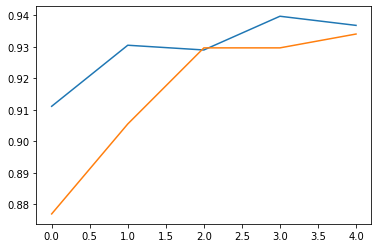

0.9473684210526315

In [50]:
clf = SVC(gamma="auto")
clf.fit(new_x_train, y_train)
train_sizes, train_scores, valid_scores = learning_curve(clf,new_x_train, y_train)
data_clean = []
data = [train_scores, valid_scores]
for items in data:
    temp = []
    for item in items:
        point = 0
        for i in item:
            point += i
        temp += [point/len(item)]
    data_clean += [temp]
x_points = list(range(len(train_sizes)))
plt.plot(x_points,data_clean[0], color="tab:blue")
plt.plot(x_points,data_clean[1], color="tab:orange")
plt.show()

acc = 0
t = clf.predict(new_x_test)
for idx in range(len(y_test)):
    if y_test[idx] == t[idx]:
        acc += 1  
acc/len(t)

Wow, that seems really high. Let's try KFold again just to see if that accuracy holds up.

## K-Fold Cross Validation

In [51]:
kf = KFold(n_splits=5)
accs = []
for train_index, test_index in kf.split(inputs):
  X_train, X_test = inputs[train_index], inputs[test_index]
  y_train, y_test = targets[train_index], targets[test_index]

  clf = SVC(gamma="auto")
  clf.fit(X_train, y_train)
  acc = 0
  t = clf.predict(X_test)
  for idx in range(len(y_test)):
      if y_test[idx] == t[idx]:
          acc += 1
  accs += [acc/len(t)]
  
print(sum(accs)/num_folds)

0.935010091600683


Well, that seems promising. It looks like due to the inherent properties of margin maximization, the model is able to outperform a MLP easily. Of course, this is partially because our data is still mostly linearly seperable. 

## Conclusion

This project is a lot of fun. I'd love to optimize more of my feature selection with other methods. I'd also love to plot other metrics like precision and recall to generate a better model on the average cases. I'm sure there's much more I can do for this porject, but I think this is where I'll call my work. The SVM seems to not only be better for linear classification, but it seems to handle generalizing much better. Working in so many dimensions means the perceptron probably needs more than a handful of nodes or a few layers to effectively learn whereas the SVM is already designed for defining the hyperplane as it works.

## Sources
- https://www.tutorialspoint.com/tensorflow/tensorflow_multi_layer_perceptron_learning.htm
- https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-keras.md
- https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
- Past two projects